In [1]:
include("../src/bmparticles.jl")
include("../src/bmtheory.jl")
using .BParts
using .Theorist
using JLD2, LaTeXStrings

In [2]:
@load "growingPop_multSims_rho.001.jld2" arenaParams growthParams msd_Sim_t msdPart_t msdLan_t
arenaParams01 = arenaParams
growthParams01 = growthParams
msd01_Sim_t = msd_Sim_t
msdPart01_t = msdPart_t
msdLan01_t = msdLan_t

@load "growingPop_multSims_rho002.jld2" arenaParams growthParams msd_Sim_t msdPart_t msdLan_t
arenaParams02 = arenaParams
growthParams02 = growthParams
msd02_Sim_t = msd_Sim_t
msdPart02_t = msdPart_t
msdLan02_t = msdLan_t

@load "growingPop_multSims_rho005.jld2" arenaParams growthParams msd_Sim_t msdPart_t msdLan_t
arenaParams05 = arenaParams
growthParams05 = growthParams
msd05_Sim_t = msd_Sim_t
msdPart05_t = msdPart_t
msdLan05_t = msdLan_t;

In [3]:
using LaTeXStrings

In [4]:
using Plots
gr()

Plots.GRBackend()

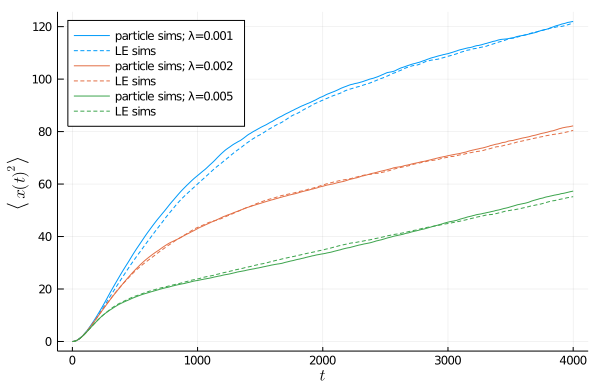

In [11]:
p1 = plot(msdPart01_t,
    color=1,
    label="particle sims; λ=0.001",
    size=(600,390),
    legend=(0.11,0.93))
plot!(msdLan01_t,
    color=1,
    label="LE sims",
    linestyle=:dash)


plot!(msdPart02_t,
    label="particle sims; λ=0.002",
    color=2)
plot!(msdLan02_t,
    label="LE sims",
    color=2,
    linestyle=:dash)

plot!(msdPart05_t,
    label="particle sims; λ=0.005",
    color=3)
plot!(msdLan05_t,
    label="LE sims",
    color=3,
    linestyle=:dash)

xlabel!(L"t")
ylabel!(L"\left\langle x(t)^2 \right\rangle")
display(p1)

savefig(p1, "../Figures/msdGrowth_time.pdf")

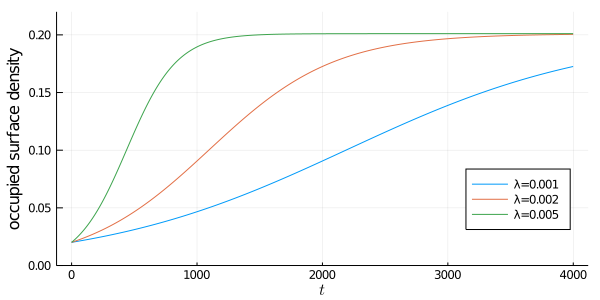

In [14]:
volumeDens(n, r, V) = n*π*r^2/V

ρ1 = growthParams01["ρ"]
ρ2 = growthParams02["ρ"]
ρ5 = growthParams05["ρ"]

f1 = plot(0:(arenaParams01["evolveTime"]-1-growthParams01["waitTime"]), 
        volumeDens.(
            Theorist.logisticGrowth.(0:(arenaParams01["evolveTime"]-growthParams01["waitTime"]-1), 
            ρ1, growthParams["k"], arenaParams["n0"]),
            arenaParams["radius"],
            arenaParams["volume"]
        ),
        label="λ=0.001",
#         linewidth=2,
        size=(600,300),
        legend=:bottomright)
plot!(0:(arenaParams01["evolveTime"]-1-growthParams01["waitTime"]), 
        volumeDens.(
            Theorist.logisticGrowth.(0:(arenaParams01["evolveTime"]-growthParams01["waitTime"]-1), 
            ρ2, growthParams["k"], arenaParams["n0"]),
            arenaParams["radius"],
            arenaParams["volume"]
        ),
        label="λ=0.002")
plot!(0:(arenaParams01["evolveTime"]-1-growthParams01["waitTime"]), 
        volumeDens.(
            Theorist.logisticGrowth.(0:(arenaParams01["evolveTime"]-growthParams01["waitTime"]-1), 
            ρ5, growthParams["k"], arenaParams["n0"]),
            arenaParams["radius"],
            arenaParams["volume"]
        ),
        label="λ=0.005")
# plot!(times_t .- growthParams["waitTime"], 
#     volumeDens.(
#         BParts.nCellsTime(cells_T_ID)[1:end],     
#         arenaParams["radius"],
#         arenaParams["volume"]
#     ),
#     label="particle simulation",
#     linewidth=2,
#     linestyle=:dash)
xlabel!(L"t")
ylabel!("occupied surface density")
# xlims!(0,arenaParams["evolveTime"]-growthParams["waitTime"])
ylims!(0,0.22)
display(f1)

savefig(f1, "../Figures/multSurfaceDensity_time.pdf")

In [7]:
arenaParamsFinal = copy(arenaParams)
arenaParamsFinal["n0"] = growthParams01["k"]
display(arenaParamsFinal)

Dict{String,Any} with 9 entries:
  "volume"     => 100.0
  "evolveTime" => 4500
  "speed"      => 0.02
  "radius"     => 0.08
  "timeStep"   => 0.1
  "E"          => 0.0002
  "bounds"     => ((0.0, 10.0), (0.0, 10.0))
  "bperiod"    => [10.0, 10.0]
  "n0"         => 1000

In [8]:
thermValsFinal = Theorist.thermalValues(arenaParamsFinal)

Dict{Any,Any} with 8 entries:
  "γ"         => 0.0802121
  "ρ"         => 0.201062
  "σc"        => 0.32
  "D"         => 1.60424e-5
  "l"         => 0.220971
  "E"         => 0.0002
  "DiffCoeff" => 0.00249339
  "n"         => 10.0

In [9]:
msdLin(t, diff) = 4*diff .* t

msdLin (generic function with 1 method)

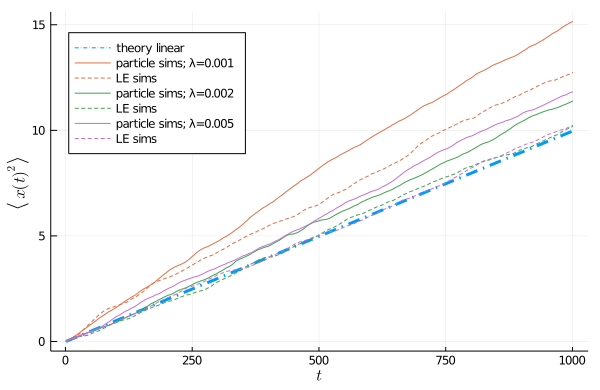

In [13]:
t0 = 3000
t1 = 4000
# times_t = 0:length(msdPart01_t[t0:end])

msdTheoryF_t = msdLin(0:length(msdPart01_t), thermValsFinal["DiffCoeff"])

p1 = plot(msdTheoryF_t[t0:t1] .- msdTheoryF_t[t0],
    color=1,
    label="theory linear",
    linestyle=:dashdot,
    linewidth=3)

plot!(msdPart01_t[t0:t1] .- msdPart01_t[t0],
    color=2,
    label="particle sims; λ=0.001",
    size=(600,390),
    legend=:topleft)
plot!(msdLan01_t[t0:t1] .- msdLan01_t[t0],
    color=2,
    label="LE sims",
    linestyle=:dash)



plot!(msdPart02_t[t0:t1] .- msdPart02_t[t0],
    label="particle sims; λ=0.002",
    color=3)
plot!(msdLan02_t[t0:t1] .- msdLan02_t[t0],
    label="LE sims",
    color=3,
    linestyle=:dash)

plot!(msdPart05_t[t0:t1] .- msdPart05_t[t0],
    label="particle sims; λ=0.005",
    color=4)
plot!(msdLan05_t[t0:t1] .- msdLan05_t[t0],
    label="LE sims",
    color=4,
    linestyle=:dash)

xlabel!(L"t")
ylabel!(L"\left\langle x(t)^2 \right\rangle")
display(p1)

savefig(p1, "../Figures/msd_popGrowth_linearPart.pdf")

In [11]:
# function mfpTheoryGrowth(t, n_t, params)
#     σ = 2*params["radius"]
#     E = params["E"]